In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now downloading the dataset

In [38]:
!wget https://cocl.us/concrete_data

--2020-07-04 16:47:54--  https://cocl.us/concrete_data
Resolving cocl.us (cocl.us)... 159.8.72.228, 159.8.69.24, 159.8.69.21
Connecting to cocl.us (cocl.us)|159.8.72.228|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv [following]
--2020-07-04 16:47:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58988 (58K) [text/csv]
Saving to: ‘concrete_data.2’

concrete_data.2     100%[===================>]  57.61K   356KB/s    in 0.2s    

2020-07-04 16:47:58 (356 KB/s

In [39]:
df = pd.read_csv('/content/concrete_data')
df.shape

(1030, 9)

In [40]:
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Installing heatmapz library to analyse the correlation

In [41]:
!pip install heatmapz

In [42]:
from heatmap import corrplot

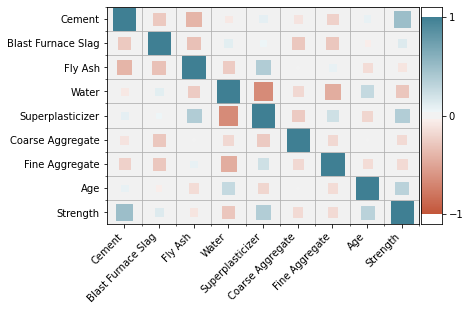

In [43]:
corr = df.corr()
corrplot(corr, size_scale=500,marker='s')

Seems all the predictors have good association!!

In [44]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Let's normalize X

In [45]:
normalized_X=(X-X.mean())/X.std()
normalized_X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state=10)

In [47]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Let's build the model😉😉😉

In [48]:
model = Sequential()
model.add(Dense(10, activation="relu", name="layer-1", input_shape=(8,)))
model.add(Dense(10, activation="relu", name="layer-2"))
model.add(Dense(10, activation="relu", name="layer-3"))
model.add(Dense(1, activation="linear", name="output"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer-1 (Dense)              (None, 10)                90        
_________________________________________________________________
layer-2 (Dense)              (None, 10)                110       
_________________________________________________________________
layer-3 (Dense)              (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(
    optimizer="adam",
    loss="mse")

In [50]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=2,
    callbacks=None,
)

Epoch 1/2
721/721 [==============================] - 0s 275us/step - loss: 1552.7316
Epoch 2/2
721/721 [==============================] - 0s 131us/step - loss: 1540.8097


In [51]:
l = model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=10)

309/309 [==============================] - 0s 178us/step


In [52]:
print(l)

1537.6761802500505


Now running the model 50 times at 100 epochs





In [53]:
loss = []

for i in range(50):
  print(f'Trial:', i)
  X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state=10+i)
  model.compile(optimizer="adam", loss="mse")
  #100 epochs now
  model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, callbacks=None) 
  l = model.evaluate(x=X_test, y=y_test, batch_size=10)
  loss.append(l)


Streaming output truncated to the last 5000 lines.
Epoch 26/100
721/721 [==============================] - 0s 115us/step - loss: 19.5660
Epoch 27/100
721/721 [==============================] - 0s 133us/step - loss: 19.1067
Epoch 28/100
721/721 [==============================] - 0s 113us/step - loss: 19.2654
Epoch 29/100
721/721 [==============================] - 0s 118us/step - loss: 19.0283
Epoch 30/100
721/721 [==============================] - 0s 113us/step - loss: 19.1145
Epoch 31/100
721/721 [==============================] - 0s 124us/step - loss: 19.0328
Epoch 32/100
721/721 [==============================] - 0s 121us/step - loss: 19.1908
Epoch 33/100
721/721 [==============================] - 0s 113us/step - loss: 18.9753
Epoch 34/100
721/721 [==============================] - 0s 117us/step - loss: 19.1157
Epoch 35/100
721/721 [==============================] - 0s 120us/step - loss: 18.9513
Epoch 36/100
721/721 [==============================] - 0s 119us/step - loss: 19.0471
Epo

In [54]:
loss = np.array(loss)
len(loss)

50

In [55]:
print(f'Average mse:',np.average(loss))
print(f'Standard deviation:',np.std(loss))

Average mse: 30.04230884382254
Standard deviation: 10.813204698324057


In [56]:
print(loss)

[93.805399   42.06947854 46.86862648 47.93039671 34.52868227 32.22808592
 36.38372638 35.01504326 33.30848247 34.51990676 29.16796148 30.40065144
 28.98354781 27.87942359 31.0923053  30.84948794 26.14156124 32.42256224
 31.86944971 28.99148703 24.17804474 22.03268651 24.95230158 27.37015652
 30.2190383  34.5960006  24.04957906 30.29428187 26.59334172 21.07940662
 27.44017733 23.33916677 22.86228885 29.06332943 27.58437373 26.72360873
 24.8672966  24.08260194 25.81121037 25.23197112 27.35609734 23.24838228
 26.13681854 25.37448936 28.88588748 23.34547501 19.83564654 25.59768173
 24.55625216 20.95158379]
